In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
%%capture 
%run "C:\Users\Lenovo\Desktop\Heart_Disease_Project_SPRINTSXMICROSOFT\notebooks\01_data_preprocessing.ipynb"

optimal number of components in PCA to capture variance more than 95% is 12 components 



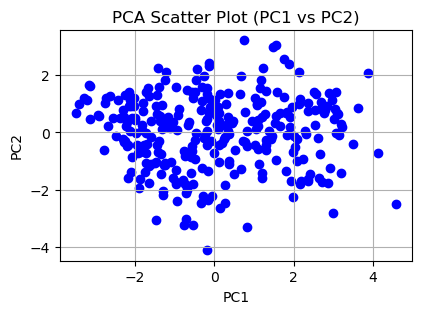

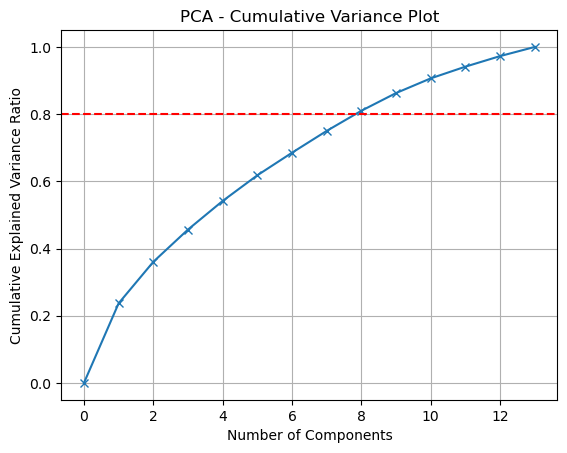

In [7]:
# 2. Determine the optimal number of principal components using the explained variance ratio using minimum threshold of 0.95
# Apply PCA
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
variances_captured = []
optimal_n_components = 0
i = False
for n in range(X_scaled.shape[1]+1):
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X_scaled)
    variance_captured = np.sum(pca.explained_variance_ratio_)
    if variance_captured>0.95 and i == False:
        optimal_n_components = n
        i = True
    variances_captured.append(variance_captured)


        
print(f"optimal number of components in PCA to capture variance more than 95% is {optimal_n_components} components \n")

# 3.1. Visualize PCA results using a scatter plot for the first two principal components
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0],X_pca[:,1],c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.grid(True)
plt.show()


# 3.2. Visualize PCA results using a cumulative variance plot
plt.subplot(1, 1, 1)
plt.plot(range(X_scaled.shape[1]+1), variances_captured, marker='x')
plt.axhline(y=0.8, color='r', linestyle='--')  # 95% threshold
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Variance Plot')
plt.grid(True)
plt.show()